https://www.geeksforgeeks.org/aspect-modelling-in-sentiment-analysis/

In [5]:
# Importing the required libraries
import spacy
sp = spacy.load("en_core_web_sm")

# Creating a list of positive and negative sentences.
mixed_sen = [
    'This chocolate truffle cake is really tasty',
    'This party is amazing!',
    'My mom is the best!',
    'App response is very slow!'
    'The trip to India was very enjoyable'
]

# An empty list for obtaining the extracted aspects
# from sentences.
ext_aspects = []

# Performing Aspect Extraction
for sen in mixed_sen:
    important = sp(sen)
    descriptive_item = ''
    target = ''
    for token in important:
        if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
            target = token.text
        if token.pos_ == 'ADJ':
            added_terms = ''
            for mini_token in token.children:
                if mini_token.pos_ != 'ADV':
                    continue
                added_terms += mini_token.text + ' '
            descriptive_item = added_terms + token.text
        ext_aspects.append({'aspect': target,
            'description': descriptive_item})

print("ASPECT EXTRACTION\n")
print(ext_aspects)


ASPECT EXTRACTION

[{'aspect': '', 'description': ''}, {'aspect': '', 'description': ''}, {'aspect': '', 'description': ''}, {'aspect': 'cake', 'description': ''}, {'aspect': 'cake', 'description': ''}, {'aspect': 'cake', 'description': ''}, {'aspect': 'cake', 'description': 'really tasty'}, {'aspect': '', 'description': ''}, {'aspect': 'party', 'description': ''}, {'aspect': 'party', 'description': ''}, {'aspect': 'party', 'description': 'amazing'}, {'aspect': 'party', 'description': 'amazing'}, {'aspect': '', 'description': ''}, {'aspect': 'mom', 'description': ''}, {'aspect': 'mom', 'description': ''}, {'aspect': 'mom', 'description': ''}, {'aspect': 'mom', 'description': 'best'}, {'aspect': 'mom', 'description': 'best'}, {'aspect': '', 'description': ''}, {'aspect': 'response', 'description': ''}, {'aspect': 'response', 'description': ''}, {'aspect': 'response', 'description': ''}, {'aspect': 'response', 'description': ''}, {'aspect': 'response', 'description': ''}, {'aspect': 'res

https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

In [22]:
doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc4 = "Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better."
doc5 = "Health experts say that Sugar is not good for your lifestyle."

# compile documents
doc_complete = [doc1, doc2, doc3, doc4, doc5]

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete] 

# Importing Gensim
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

print(ldamodel.print_topics(num_topics=3, num_words=3))

[nltk_data] Downloading package wordnet to C:\Users\Master of the
[nltk_data]     House\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[(0, '0.076*"sugar" + 0.075*"lifestyle" + 0.075*"expert"'), (1, '0.065*"driving" + 0.065*"father" + 0.065*"sister"'), (2, '0.059*"pressure" + 0.059*"sister" + 0.059*"father"')]


https://medium.com/swlh/tweets-classification-and-clustering-in-python-b107be1ba7c7

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import en_core_web_sm
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score

# remove the hashtags, mentions and unwanted characters.
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r”         (@[A-Za-z0–9]+)|([⁰-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?”, “”,   elem)) 
    return df
tweets_bowl = clean_text(tweets_bowl, ‘tweets’)
tweets_bowl.head()```

nlp = en_core_web_sm.load() 
tokenizer = RegexpTokenizer(r’\w+’)
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words(‘english’))
punctuation = list(string.punctuation) #already taken care of with the cleaning function.
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()
def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return “ “.join(final_text)
tweets_bowl.tweets = tweets_bowl.tweets.apply(furnished)

# Aspect Identifying
###### 7/6 - Assigment 4
<p> We take the tweets out of the data, clean them of html, hashtags and mentions, then run the text through a tokenizer before identifying the most common words/phrases throughout the tweets. Those common words/phrases are then the aspects we base the clustering of the tweets on. As of right now, the model is using singular terms with a fixed dictionary, the hope is to move towards a dynamic dictionary that grows with the new data recieved.</p>

###### 7/12 - Assigment 5
<p>We are now showing the top 10 words per cluster and doing postprocessing on those words for cluster assignment. Instead of trying to assign one cluster at first, each tweet has been given a cluster ranking, indicating how much of a cluster each one is assigned to. Also, we have added in clustering by k-means to determine the amount of clusters there should be through a scientific and data-driven approach, rather than 5 for convenience.</p>

7/19 - Assignment 6

In [1]:
import preprocessor as p #https://pypi.org/project/tweet-preprocessor/
import numpy as np
import pandas as pd
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction
import string
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
#https://www.programcreek.com/python/example/83254/sklearn.feature_extraction.text.TfidfVectorizer
def create_union_model(params=None):
    def preprocessor(tweet):
        tweet = tweet.lower()

        for k in emo_repl_order:
            tweet = tweet.replace(k, emo_repl[k])
        for r, repl in re_repl.iteritems():
            tweet = re.sub(r, repl, tweet)

        return tweet.replace("-", " ").replace("_", " ")

    tfidf_ngrams = TfidfVectorizer(preprocessor=preprocessor,
                                   analyzer="word")
    ling_stats = LinguisticVectorizer()
    all_features = FeatureUnion(
        [('ling', ling_stats), ('tfidf', tfidf_ngrams)])
    #all_features = FeatureUnion([('tfidf', tfidf_ngrams)])
    #all_features = FeatureUnion([('ling', ling_stats)])
    clf = MultinomialNB()
    pipeline = Pipeline([('all', all_features), ('clf', clf)])

    if params:
        pipeline.set_params(**params)

    return pipeline 

Read the tweets

In [2]:
df = pd.read_csv('data/Tweets.csv')
tweets = df.text

In [3]:
new_tweets = []
for tweet in tweets:
    tweet = tweet.lower()
    tweet = BeautifulSoup(tweet, 'html.parser').getText()
    tweet = p.clean(tweet)
    new_tweets.append(tweet)

In [4]:
tweets = new_tweets
#tweets

In [5]:
stopwords = nltk.corpus.stopwords.words('english')

stemmer = SnowballStemmer("english")

In [6]:
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [7]:
def tokenize_only(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [8]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in tweets:
    allwords_stemmed = tokenize_and_stem(i) # for each item in 'tweets', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) # extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [9]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

In [10]:
#https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=10,
                                   stop_words='english', max_features=10000,
                                   strip_accents='unicode', use_idf=True, 
                                   tokenizer=tokenize_and_stem, ngram_range=(2,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(tweets) #fit the vectorizer to tweets

C:\Code\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Wall time: 10.2 s


In [12]:
terms = tfidf_vectorizer.get_feature_names()
print(terms)
tfidf_vectorizer.fit(tweets)
%time text = tfidf_vectorizer.transform(tweets)
print(text)


["'d like", "'d love", "'m fli", "'m flight", "'m just", "'m sorri", "'m stuck", "'m sure", "'m tri", "'s bag", "'s best", "'s cancel", "'s ceo", "'s ceo battl", "'s delay", "'s fleek", "'s flight", "'s good", "'s happen", "'s hour", "'s just", "'s new", "'s ok", "'s time", "'s whi", 'admir club', 'agent help', "agent n't", 'agent phone', 'airlin cancel', 'airlin cancel flight', 'airlin flight', 'airlin ve', 'airport hour', 'alreadi cancel', 'american airlin', 'ani airlin', 'ani chanc', 'ani flight', 'ani help', 'ani idea', 'ani info', 'ani updat', 'ani way', 'anoth airlin', 'anoth flight', 'anoth hour', 'answer phone', 'anyon phone', 'app say', 'appeas passeng', 'appeas passeng wall', 'avail flight', 'awesom flight', 'awesom thank', 'bad weather', "bag 's", 'bag check', 'bag flight', 'bag lost', "bag n't", 'baggag claim', 'baggag fee', 'battl appeas', 'battl appeas passeng', 'becaus flight', "becaus n't", 'befor board', 'befor flight', 'best airlin', 'best flight', 'big thank', 'board

C:\Code\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Wall time: 9.47 s
  (2, 146)	1.0
  (5, 146)	1.0
  (6, 625)	0.7071067811865476
  (6, 164)	0.7071067811865476
  (13, 2)	1.0
  (16, 232)	0.7040194507073237
  (16, 121)	0.7101806904061515
  (19, 684)	1.0
  (20, 554)	1.0
  (25, 588)	1.0
  (26, 702)	0.5943321869893338
  (26, 429)	0.8042196537690904
  (27, 472)	1.0
  (28, 431)	0.8590490746027691
  (28, 81)	0.511893238306706
  (29, 408)	1.0
  (30, 316)	0.589724360740038
  (30, 192)	0.4456153511459782
  (30, 191)	0.4312458548660925
  (30, 81)	0.31625496656034874
  (30, 77)	0.40946543927360435
  (36, 489)	1.0
  (37, 69)	1.0
  (38, 75)	1.0
  (41, 626)	1.0
  :	:
  (14627, 197)	0.4076393846551074
  (14627, 96)	0.3499214287883302
  (14627, 81)	0.3489807168159074
  (14627, 23)	0.6276553008543857
  (14628, 125)	1.0
  (14629, 107)	1.0
  (14632, 519)	0.6098629620937192
  (14632, 456)	0.6578626857432153
  (14632, 154)	0.44190932799953253
  (14633, 636)	0.5103074665344262
  (14633, 241)	0.5813533971666575
  (14633, 199)	0.4028104856783904
  (14633, 197)	0

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters


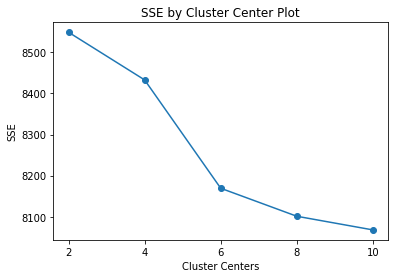

In [13]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 10)

In [14]:
cluster_amt = 6

In [15]:
clusters = MiniBatchKMeans(n_clusters=cluster_amt, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

In [16]:
from sklearn.cluster import KMeans

num_clusters = cluster_amt

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 1.22 s


In [17]:
Tweets = {'tweet': tweets, 'cluster': clusters}

#frame = pd.DataFrame(Tweets, clusters)
frame = pd.DataFrame(Tweets)
frame['Aspect'] = "Miscellaneous"
frame['Customer Service'] = 0
frame['Delays'] = 0
frame['Cancelled Flight(s)'] = 0
frame['Seating'] = 0
frame['Baggage'] = 0


#print(frame)

frame['cluster'].value_counts() #number of tweets per cluster (clusters from 0 to 5)


0    13563
4      426
5      322
3      154
2      111
1       64
Name: cluster, dtype: int64

In [18]:
comparison_count = frame['cluster'].value_counts().min()

In [19]:
clusterwords = pd.DataFrame(columns = ['Cluster', 'Word', "Reason"])

In [20]:
aspectsDF = pd.DataFrame(columns = ['Word', "Reason"])

In [21]:
print("Top terms per cluster:")

#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(cluster_amt):
    print("Cluster %d words:" % i, end='')
    name = "Cluster %d words:" % i
    
    for ind in order_centroids[i, :10]:
        word = ' %s' % vocab_frame.loc[terms[ind]].values.tolist()[0][0]
        print(word, end=',')
        clusterwords.loc[len(clusterwords.index)] = [i, word, "Miscellaneous"]
    print() #add whitespace
    print() #add whitespace


Top terms per cluster:
Cluster 0 words:

KeyError: "ca n't"

In [ ]:
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

aspect_words = []

for i in range(cluster_amt):
    for ind in order_centroids[i, :comparison_count]:
        word = ' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0]
        word = word.replace(" ", "")
        if word not in aspect_words:
            aspect_words.append(word)
            aspectsDF.loc[len(aspectsDF.index)] = [word, "Miscellaneous"]

In [ ]:
aspect_assignments = {'Customer Service':['service', 'customer', 'phone', 'agent', 'email', 'speak', 'help', 'please', 'need', 'know', 'why', 'call'], 
                       'Delays':['delay', 'delayed', 'hour', 'hold', 'waited', 'late', 'status', 'schedule'], 
                       'Cancelled Flight(s)':['cancelled', 'rebook', 'missed', 'cancel', 'reschedule'], 
                       'Seating': ['book', 'booking', 'seats', 'seat', 'boarding'],
                       'Baggage': ['bag', 'gate', 'check', 'lost', 'baggage', 'bags']
                      }

aspectsDF['Customer Service'] = 0
aspectsDF['Delays'] = 0
aspectsDF['Cancelled Flight(s)'] = 0
aspectsDF['Seating'] = 0
aspectsDF['Baggage'] = 0

def get_key(val):
    for key, value in aspect_assignments.items():
        for item in value:
            if (val == item):
                return key

In [ ]:
#print(aspectsDF)

In [ ]:
for i in range(len(aspect_words)):
    tof = False
    word = aspect_words[i]
    aspect_name = "Miscellaneous"
    for value in aspect_assignments.values():
        for item in value:
            if (word == item):
                tof = True
                aspect_name = get_key(word)
                break
    aspectsDF.loc[i, 'Reason'] = aspect_name

In [ ]:
#aspectsDF

In [ ]:
for tweet in tweets:
    cs= 0
    de= 0
    cf= 0
    se= 0
    ba= 0
    tweet_array = tweet.split(" ")
    for word in tweet_array:
        if word in aspectsDF.values:
            index = aspectsDF.index[aspectsDF['Word'] == word].tolist()[0]
            aspect = aspectsDF.Reason.values[index]
            if aspect == 'Customer Service':
                cs += 1
            if aspect == 'Delays':
                de += 1
            if aspect == 'Cancelled Flight(s)':
                cf += 1
            if aspect == 'Seating':
                se += 1
            if aspect == 'Baggage':
                ba += 1
                
    assignments = {'cs': cs,'de': de,'cf': cf,'se': se,'ba': ba}
    aspects = {'cs': 'Customer Service','de': 'Delays','cf': 'Cancelled Flight(s)','se': 'Seating','ba': 'Baggage', 'me': "Miscellaneous"}
    test_value = max(assignments.values())
    test_key = 'me'
    if test_value == 0:
        test_key = 'me'
    for key, value in assignments.items():
        if test_value == value:
            test_key = key
            break
            
    tweet_index = frame.index[frame['tweet'] == tweet].tolist()[0]
    frame.loc[tweet_index, 'Aspect'] = aspects[test_key]
    frame.loc[tweet_index, 'Customer Service'] = cs
    frame.loc[tweet_index, 'Delays'] = de
    frame.loc[tweet_index, 'Cancelled Flight(s)'] = cf
    frame.loc[tweet_index, 'Seating'] = se
    frame.loc[tweet_index, 'Baggage'] = ba

In [ ]:
#frame

In [ ]:
df['Aspect'] = frame['Aspect']
df['Customer Service'] = frame['Customer Service']
df['Delays'] = frame['Delays']
df['Cancelled Flight(s)'] = frame['Cancelled Flight(s)']
df['Seating'] = frame['Seating']
df['Baggage'] = frame['Baggage']

df.head()

In [ ]:
#https://codereview.stackexchange.com/questions/249329/finding-the-most-frequent-words-in-pandas-dataframe
# for i in range(num_clusters):
#     words = clusterwords[clusterwords.isin([i]).any(axis=1)]
#     word_count = Counter(" ".join(words.Word).split()).most_common(10)
#     word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
#     print(word_frequency)
#     print("Cluster ", i, "'s most frequent word is: ", word_frequency.Word)

In [ ]:
df.to_csv('clustered_tweets.csv')